2019 UEFA Champions League Final - Liverpool vs. Tottenham Hotspur
Liverpool Passes 

In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from mplsoccer import Pitch
from statsbombpy import sb
from PIL import Image

In [60]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-09-28T20:46:38.893391,2025-07-06T04:26:07.636270,2025-07-06T04:26:07.636270,2024-09-28T20:46:38.893391
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,NaN,NaN,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-09-28T01:57:35.846538,NaN,NaN,2024-09-28T01:57:35.846538
3,16,4,Europe,Champions League,male,False,False,2018/2019,2025-05-08T15:10:50.835274,2021-06-13T16:17:31.694,NaN,2025-05-08T15:10:50.835274
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,NaN,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,NaN,2024-02-12T14:45:05.702250
71,53,315,Europe,UEFA Women's Euro,female,False,True,2025,2025-07-28T14:19:20.467348,2025-07-29T16:03:07.355174,2025-07-29T16:03:07.355174,2025-07-28T14:19:20.467348
72,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
73,72,107,International,Women's World Cup,female,False,True,2023,2025-07-14T10:07:06.620906,2025-07-14T10:10:27.224586,2025-07-14T10:10:27.224586,2025-07-14T10:07:06.620906


In [61]:
sb.matches(competition_id=16, season_id=4)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,22912,2019-06-01,21:00:00.000,Europe - Champions League,2018/2019,Tottenham Hotspur,Liverpool,0,2,available,...,2021-06-13T16:17:31.694,13,Final,\tEstádio Cívitas Metropolitano,Damir Skomina,Mauricio Roberto Pochettino Trossero,Jürgen Klopp,1.1.0,2,2


In [62]:
events = sb.events(match_id = 22912)
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected

In [63]:
events = events[['team', 'type', 'pass_type', 'player', 'location', 'pass_end_location']]
events = events[events['team'] == 'Liverpool']
events.head(10)

,team,type,pass_type,player,location,pass_end_location
1,Liverpool,Starting XI,NaN,NaN,NaN,NaN
2,Liverpool,Half Start,NaN,NaN,NaN,NaN
4,Liverpool,Half Start,NaN,NaN,NaN,NaN
6,Liverpool,Pass,Kick Off,Jordan Brian Henderson,"[61.0, 40.1]","[34.0, 43.8]"
7,Liverpool,Pass,NaN,Joël Andre Job Matip,"[36.1, 44.0]","[86.6, 3.5]"
9,Liverpool,Pass,Recovery,Fábio Henrique Tavares,"[65.6, 14.2]","[82.8, 17.1]"
11,Liverpool,Pass,Recovery,Jordan Brian Henderson,"[75.2, 19.4]","[86.4, 20.3]"
13,Liverpool,Pass,Recovery,Virgil van Dijk,"[59.5, 19.6]","[65.4, 19.2]"
14,Liverpool,Pass,NaN,Georginio Wijnaldum,"[64.7, 18.4]","[64.9, 23.8]"
15,Liverpool,Pass,NaN,Jordan Brian Henderson,"[64.3, 24.3]","[99.2, 24.5]"


In [64]:
events['pass_type'].unique()

<ArrowStringArray>
[           nan,     'Kick Off',     'Recovery',     'Throw-in',
    'Goal Kick',       'Corner',    'Free Kick', 'Interception']
Length: 8, dtype: str

There appears to be a few NaN values in the dataset. Upon closer inspection there are 8 rows. We will drop these from the dataset. 

In [65]:
events.loc[events["player"].isna(), ["team", "pass_type", "location", "pass_end_location"]]

,team,pass_type,location,pass_end_location
1,Liverpool,NaN,NaN,NaN
2,Liverpool,NaN,NaN,NaN
4,Liverpool,NaN,NaN,NaN
3148,Liverpool,NaN,"[50.9, 64.0]",NaN
3150,Liverpool,NaN,NaN,NaN
3152,Liverpool,NaN,NaN,NaN
3161,Liverpool,NaN,NaN,NaN
3163,Liverpool,NaN,NaN,NaN


Within events pass_type, we see 'Throw-in' is included. We want to exclude this. There

In [66]:
passes = events[(events['type'] == 'Pass') & (events['pass_type'] != 'Throw-in')].dropna(subset=['player'])
print(passes['player'].isna().sum())
passes.head(100)

0


,team,type,pass_type,player,location,pass_end_location
6,Liverpool,Pass,Kick Off,Jordan Brian Henderson,"[61.0, 40.1]","[34.0, 43.8]"
7,Liverpool,Pass,NaN,Joël Andre Job Matip,"[36.1, 44.0]","[86.6, 3.5]"
9,Liverpool,Pass,Recovery,Fábio Henrique Tavares,"[65.6, 14.2]","[82.8, 17.1]"
11,Liverpool,Pass,Recovery,Jordan Brian Henderson,"[75.2, 19.4]","[86.4, 20.3]"
13,Liverpool,Pass,Recovery,Virgil van Dijk,"[59.5, 19.6]","[65.4, 19.2]"
...,...,...,...,...,...,...
239,Liverpool,Pass,NaN,Andrew Robertson,"[91.7, 20.7]","[107.8, 35.2]"
251,Liverpool,Pass,Recovery,Virgil van Dijk,"[35.7, 32.0]","[62.0, 23.4]"
255,Liverpool,Pass,Recovery,Trent Alexander-Arnold,"[49.8, 43.4]","[83.6, 21.7]"
262,Liverpool,Pass,NaN,Trent Alexander-Arnold,"[49.2, 63.6]","[119.6, 66.5]"


In [67]:
players = list(passes['player'].unique())
players

['Jordan Brian Henderson',
 'Joël Andre Job Matip',
 'Fábio Henrique Tavares',
 'Virgil van Dijk',
 'Georginio Wijnaldum',
 'Sadio Mané',
 'Andrew Robertson',
 'Trent Alexander-Arnold',
 'Mohamed Salah',
 'Alisson Ramsés Becker',
 'Roberto Firmino Barbosa de Oliveira',
 'James Philip Milner',
 'Divock Okoth Origi',
 'Joe Gomez']

In [68]:
badge = Image.open('Liverpool.png')

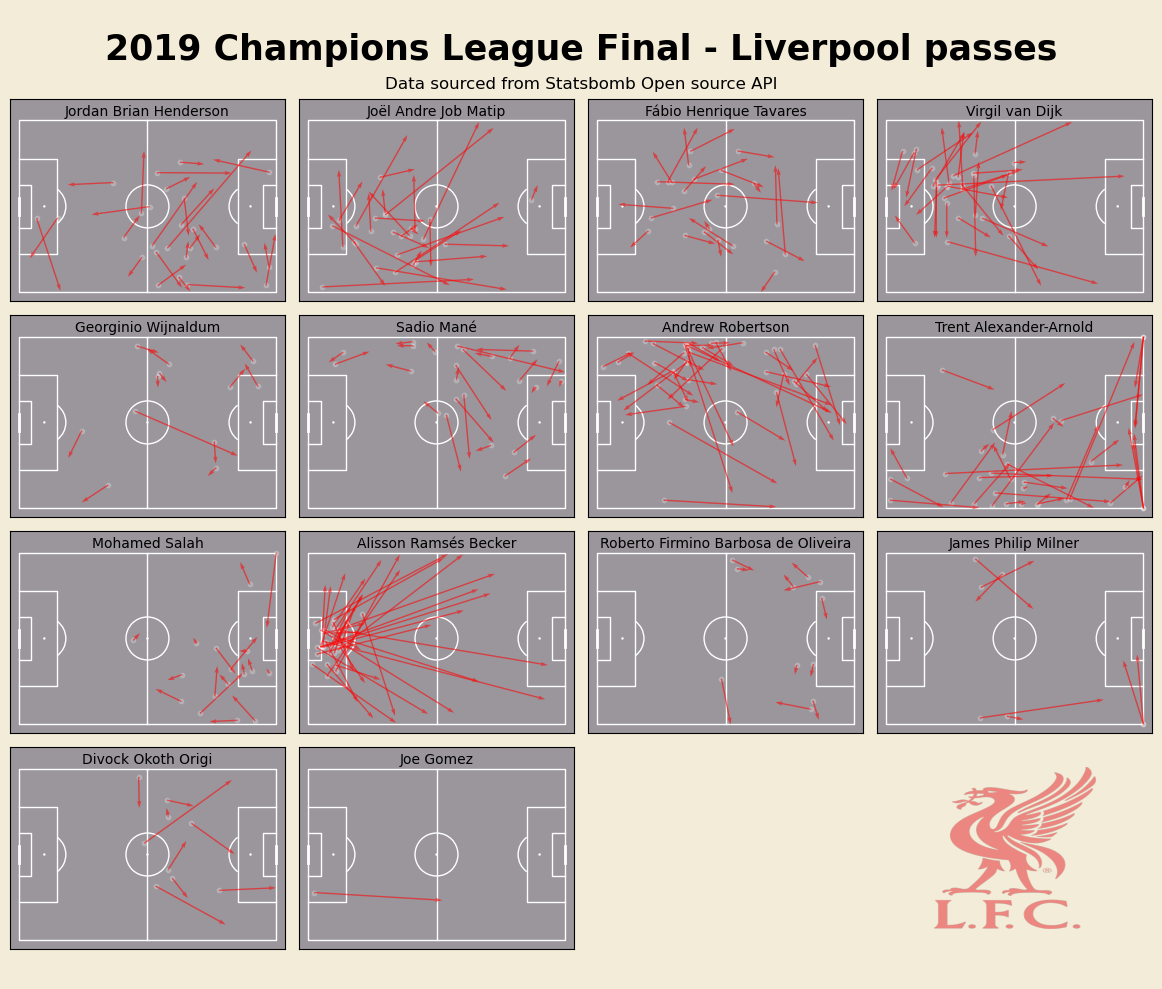

<Figure size 640x480 with 0 Axes>

In [85]:
pitch = Pitch(pitch_type='statsbomb', axis=True, pad_top=10, line_color='white', linewidth=1, pitch_color='#9A969C')
fig, axs = pitch.grid(figheight =10, nrows = 4, ncols = 4, grid_height=0.85, title_height=0.08, space=0.05, endnote_height=0.02, axis=False)
fig.set_facecolor('#F3ECD9')
for player, ax in zip(players, axs['pitch'].flat):
  player_data = passes[passes['player'] == player]
  x = player_data['location'].str[0]
  y = player_data['location'].str[1]
  dx = player_data['pass_end_location'].str[0] 
  dy = player_data['pass_end_location'].str[1] 

  pitch.scatter(x, y, color='white', s=10, alpha=0.2, ax=ax)
  pitch.arrows(x, y, dx, dy, color='#FB0808', width=1, alpha=0.6, ax=ax)

  ax.set_title(player, ha='center', va='center', y = 0.9, fontsize = 10)

axs['pitch'][-1, 2].remove()
axs['pitch'][-1, 3].cla()
axs['pitch'][-1, 3].set_axis_off()
title = axs['title'].text(0.5, 0.5, "2019 Champions League Final - Liverpool passes", ha='center', va='center', fontsize = 25, fontweight='bold')
fig.text(x=0.5, y=0.91, s="Data sourced from Statsbomb Open source API", ha='center', va='center', fontsize=12)

axs['pitch'][3,3].set_xlim(0,100)
axs['pitch'][3,3].set_ylim(0,100)

axs['pitch'][3,3].imshow(X=badge, extent=(10, 90, 10, 90), alpha = 0.5, zorder=10, aspect='equal')
plt.savefig("UCL_Final_2019_Liverpool_Passes.png")
plt.show()
plt.clf()


